In [1]:
import numpy as np
import matplotlib.pyplot as plt

# to have a nice palette of colors
import seaborn as sns
sns.set(style="ticks",font_scale=1, context="talk")

# to process strings, regular expressions
import re
# to download image from a url
import urllib.request
# pyitunes library
import itunes
# small module to import an image
from PIL import Image

In [2]:
def ExtractAlbumCovers(artistName,PrintAlbums=0,ImportOnly=0):
    '''
    1. Fetches from the itunes API the artwork of all albums, mixtapes and compilations image 
    covers from an artist with name artistName,
    (avoiding all other projects or singles as much as possible),
    2. Download covers as jpeg,
    3. Place covers in "Album_Covers" folder, as Artist_AlbumName_AlbumGenre.jpg
    
    - astistname is a str
    - Set PrintAlbums to 1 to also print the list of albums.
    - Gives the option to only import the images without downloading (if its already been done)
    
    Returns the list of triples (album name, album genre, 3 channels array) where the array
    is the converted image of the album cover.
    '''
    albums_list = []
    
    # look in the itunes for the artist (most probably the first name is the one you're looking
    # for, hence the [0])
    # if we cannot find the artist, meaning the list of possible artists is empty, we do nothing. 
    if len(itunes.search_artist(artistName)) > 0:
        
        artist = itunes.search_artist(artistName)[0]

        if PrintAlbums == 1:
            print("Albums:")

        # -------MAIN LOOP: go through all albums of the artist, and download the artwork ---
        for album in artist.get_albums():
    
            album_name = album.name
            
            # Skip the loop step if we have already seen the album name before. 
            # (Avoid duplicates in albums)
            if album_name in [el[0].split("_")[1] for el in albums_list]:
                continue
        
            # We keep only the albums, and exclude the singles or the remix albums: 
            # discard the names specifying it is a Single (they finish with "- Single")
            split1 = album_name.split()
            if (len(split1) in [1,2]) or ((split1[-2] != '-') and (split1[-1] not in ['Single','Remixes'])):
            
                if PrintAlbums == 1:
                    print(album_name)
                
                # ----------- Extract the genre of the album -----------
                # split category names with "/" inside
                album_genre0 = album.genre.split("/")[0]
                
                # we put together all rap categories and country categories                
                if album_genre0 in ["Rap","Gangsta Rap","Hip-Hop"]:
                    album_genre = "Rap"
                else:
                    if album_genre0 in ["Country","Contemporary Country"]:
                        album_genre = "Country"
                    else:
                        album_genre = album_genre0
                                
                # ----------- DOWNLOAD ALBUM COVERS AND PUT IN A FOLDER -----------
                artist_name = album.artist.name
                
                # Download from the url, and put the image in the album covers folder.
                # NOTE: a "/" in the album/artist name creates a confusion with the file path.
                # So we test: if the split of the name using "/" as the separator is the same 
                # as the original name, we let the name as is; otherwise we remove the "/".
                album_split, artist_split = album_name.split("/"), artist_name.split("/")
                if (album_split[0] == album_name) and (artist_split[0] == artist_name):
                    file_name = ''.join(["Album_Covers/",artist_name,"_",album_name,"_",album_genre,".jpg"])
                else:
                    # put together the pieces of the name without the "/"
                    album_name2 = ''.join(elem for elem in album_split)
                    artist_name2 = ''.join(elem for elem in artist_split)
                    file_name = ''.join(["Album_Covers/",artist_name2,"_",album_name2,"_",album_genre,".jpg"])
            
                # don't consider albums with artist_name which is too long to avoid issues 
                # when creating the file
                if len(file_name)<200:   
                
                    if ImportOnly==0:
                        # album cover url (high resolution so "600)
                        artwork_url = album.artwork['600']
                        urllib.request.urlretrieve(artwork_url,file_name)
    
                    # ---- IMPORT THE IMAGES HERE AS NUMPY ARRAYS ----
                    # import the image with the Image function
                    myImage = Image.open(file_name)        
                    # convert it into a numpy array with 3 channels.
                    myImage_array = np.array(myImage)

                    # ---- add the triple (string name of album, album cover, album_genre) ----
                    albums_list.append((''.join([album.artist.name,"_",album_name]),album_genre,myImage_array))

                    
            
    return albums_list

Let's look at Kanye West's albums, as an example. 

In [3]:
KanyeAlbums = ExtractAlbumCovers("Kanye West",PrintAlbums=1)

Albums:
My Beautiful Dark Twisted Fantasy
Yeezus
The College Dropout
Late Registration
JESUS IS KING
Watch the Throne
ye
KIDS SEE GHOSTS
Graduation
Watch the Throne (Deluxe Version)
My Beautiful Dark Twisted Fantasy (Deluxe Edition)
Watch the Throne (Deluxe)
Wouldn't You Like to Ride (S & S Remixes) [feat. Kanye West, Common & JV]
808s & Heartbreak
The Life of Pablo


Let's visualize the cover his legendary first album: The College Dropout. (I am here using the %matplotlib inline command so that you see it well; you shall use the %matplotlib notebook command to play a bit and zoom over the images.)

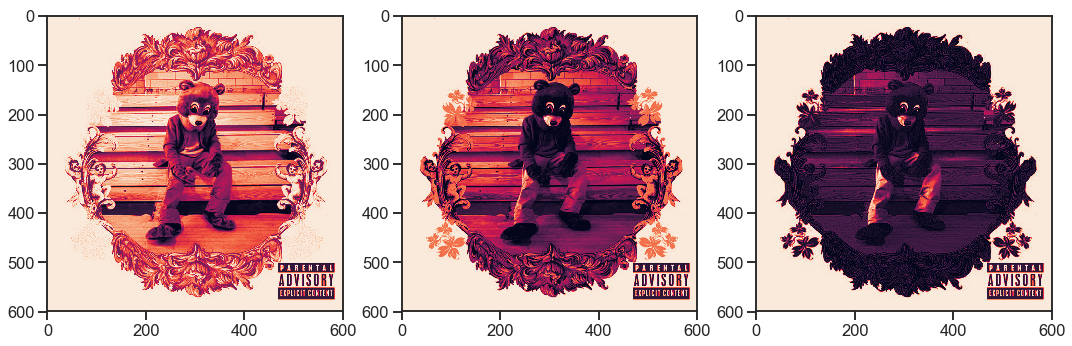

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 7)

# print the 3 RGB channels of the college dropout album cover (The 3rd album in the list)
album_index = 2
plt.figure()
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.imshow(KanyeAlbums[album_index][2][:,:,i-1])
plt.show()